In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# загружаем данные
df = pd.read_csv('click_data.csv')

In [3]:
df

,event_click,ad_id,publisher_place_type,publisher_website,ci_image_cat,ci_text_cat,publisher_place_group_type,EventDate,date,visitor_session_id,visitor_device,visitor_device_os,visitor_country,visitor_region,visitor_browser,publisher_place_id
0,0,1693485468,Just Banner,popcornnews.ru,['0'],['11'],Just Banner,2023-08-31,2023-08-31 17:03:02+03:00,2890dd55-0a37-4975-af15-e3c54fc4c0f2,Mobile,iOS,RU,Bryanskaya oblast,Safari,635bc1911e2b546885a37ec3
1,0,1691583125,Just Banner,yaplakal.com,['0'],['11'],Just Banner,2023-08-30,2023-08-30 00:04:40+03:00,c342ad4f-0ad7-4638-a0ce-d916152a59f9,Desktop,Windows,RU,Moskovskaya oblast,Chrome,63fddeae6edefd2517e8cc2f
2,0,1692811008,Just Banner,vokrug.tv,['0'],['11'],Just Banner,2023-08-30,2023-08-30 07:32:19+03:00,8bb0fd0f-ac3c-40af-8910-8e45ace4438f,Mobile,Android,RU,Moskva,Chrome,635905586bbec9d50a81aa02
3,0,1693479582,Just Banner,starhit.ru,['0'],['11'],Just Banner,2023-08-31,2023-08-31 14:49:08+03:00,4c3c8956-2614-4414-ba5c-4afe68e4597c,Mobile,iOS,RU,Tatarstan Respublika,Safari,633d43a60601f31045e72a7d
4,0,1690896125,Just Banner,kinoafisha.info,['0'],"['1', '11', '211']",Just Banner,2023-08-30,2023-08-30 03:44:20+03:00,47abb888-6742-4cef-ba73-ac6a0afeb666,Mobile,Android,RU,YamaloNenetskiy avtonomnyy okrug,Chrome,6359204c1e2b546885a37e83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0,1693555201,Just Banner,el-montage.ru,['0'],['11'],Just Banner,2023-09-01,2023-09-01 16:39:52+03:00,f3fe2d01-5045-47b7-9486-4d80e5b3e5b6,Mobile,Android,RU,Altayskiy kray,Chrome,646b4b54475a23c8614fc02c
94940,0,1693308334,Just Banner,kinoafisha.info,['0'],"['1', '13']",Just Banner,2023-08-30,2023-08-30 23:49:16+03:00,9a27a14a-025b-4f2e-8837-abdbfb402e5b,Mobile,Android,RU,Krasnodarskiy kray,Chrome,635bbdfd1e2b546885a37ebb
94941,0,1692022985,Just Banner,el-montage.ru,['0'],['11'],Just Banner,2023-08-30,2023-08-30 07:32:12+03:00,80691311-64d7-4f30-9526-23decd34f65e,Mobile,Android,RU,Samarskaya oblast,Chrome,646b4b54475a23c8614fc02c
94942,1,1693151817,Just Banner,7days.ru,['0'],['11'],Just Banner,2023-09-02,2023-09-02 20:49:27+03:00,febddaf6-1416-4811-973c-45c738233ca9,Mobile,Android,RU,SanktPeterburg,Chrome,63590ab66bbec9d50a81aa08


### Разведочный анализ данных

In [4]:
# информация о типе данных каждого столбца
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94944 entries, 0 to 94943
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   event_click                 94944 non-null  int64 
 1   ad_id                       94944 non-null  int64 
 2   publisher_place_type        94944 non-null  object
 3   publisher_website           94944 non-null  object
 4   ci_image_cat                94944 non-null  object
 5   ci_text_cat                 94944 non-null  object
 6   publisher_place_group_type  94944 non-null  object
 7   EventDate                   94944 non-null  object
 8   date                        94944 non-null  object
 9   visitor_session_id          94944 non-null  object
 10  visitor_device              94944 non-null  object
 11  visitor_device_os           94944 non-null  object
 12  visitor_country             94944 non-null  object
 13  visitor_region              94930 non-null  ob

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
# смотрим есть ли пустые строки
df.isnull().sum()

event_click                    0
ad_id                          0
publisher_place_type           0
publisher_website              0
ci_image_cat                   0
ci_text_cat                    0
publisher_place_group_type     0
EventDate                      0
date                           0
visitor_session_id             0
visitor_device                 0
visitor_device_os              0
visitor_country                0
visitor_region                14
visitor_browser                0
publisher_place_id             0
dtype: int64

In [7]:
# пустые строки есть в столбце visitor_region. заполним их самым распространенным регионом - Московской областью

In [8]:
df.visitor_region.value_counts() 

Moskovskaya oblast            9510
Sverdlovskaya oblast          5266
Krasnodarskiy kray            5263
SanktPeterburg                4263
Moskva                        4009
                              ... 
Altay Respublika                44
Tyva Respublika                 38
Magadanskaya oblast             34
Ingushetiya Respublika          16
Nenetskiy avtonomnyy okrug      11
Name: visitor_region, Length: 83, dtype: int64

In [9]:
values = {"visitor_region": "Moskovskaya oblast"}
df = df.fillna(value=values)

In [10]:
df.visitor_region.isnull().sum()

0

0    79120
1    15824
Name: event_click, dtype: int64


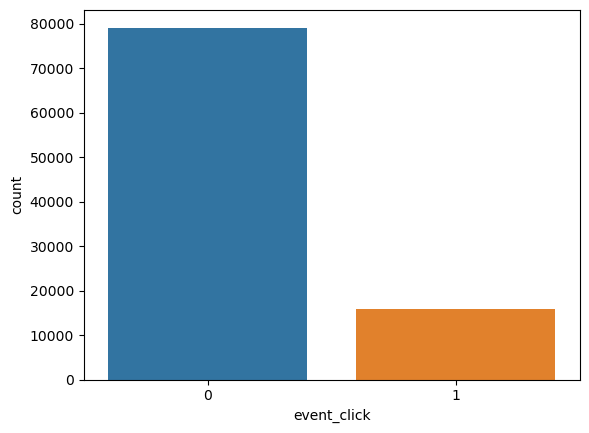

In [11]:
# посмотрим на распределение кликов. данные несбалансированные, поэтому метрику accuracy спользовать при оценке не будем
print(df.event_click.value_counts())
plt.figure()
sns.countplot(x='event_click', data=df)
plt.show()

In [12]:
# столбец "номер рекламной кампании" использовать не будем, поскольку она никак не влияет на разделимость данных
print(len(df.ad_id.unique()))  
df.ad_id.value_counts()

113


1693555201    7762
1693485468    5473
1692032000    3915
1692956708    3567
1693316580    3142
              ... 
1693564479       1
1692201987       1
1693487419       1
1693582832       1
1693238128       1
Name: ad_id, Length: 113, dtype: int64

In [13]:
# publisher_place_type также не будет использовать, так как уникальных значений в столбце всего 2, и один из них в единственном экземпляре. 
# столбец не несет в себе важной информации
df.publisher_place_type.value_counts() #delete this column

Just Banner               94943
Astra Native Resizable        1
Name: publisher_place_type, dtype: int64

In [14]:
# информация о количестве уникальных вебсайтов паблишеров (их 320)
df.publisher_website.value_counts()

yaplakal.com       13396
fotostrana.ru       7992
sportbox.ru         6584
kinoafisha.info     6424
7days.ru            5542
                   ...  
turktv.me              1
flarix.tv              1
animego.today          1
turkcinema.one         1
rserials.online        1
Name: publisher_website, Length: 320, dtype: int64

In [15]:
# информация о категориях изображения также бесполезна, поскольку содержит всего один уникальный элемент
df.ci_image_cat.value_counts()

['0']    94944
Name: ci_image_cat, dtype: int64

In [16]:
# информация о категориях текста - основная в датасете
df.ci_text_cat.unique()

array(["['11']", "['1', '11', '211']", "['1', '11']", "['1', '10']",
       "['1', '13']", "['11', '211']", "['11', '213']",
       "['2200', '11', '220']", "['1', '11', '220']",
       "['1', '10', '211']", "['2042', '11', '204']",
       "['2000', '11', '200']", "['11', '220', '22015']",
       "['200', '1', '11', '2006']", "['11', '220']",
       "['1', '11', '213']", "['2200', '1', '11', '220']",
       "['11', '220', '2206']", "['1', '11', '204']",
       "['11', '2060', '206']", "['11', '3']", "['1', '10', '213']",
       "['11', '204']", "['1', '10', '220', '22015']",
       "['1', '11', '206']", "['200', '11']", "['1', '10', '220']",
       "['1', '11', '2060', '206']", "['1', '11', '220', '22015']",
       "['200', '11', '2000']", "['2000', '1', '11', '200']",
       "['11', '220', '22023']", "['200', '1', '11']",
       "['200', '1', '11', '2004']", "['1', '11', '220', '2206']",
       "['1', '21700', '21701', '2120', '201', '11', '206', '2190', '207', '212', '213', '217', '2

In [17]:
# данные о publisher_place_group_type также удаляем
df.publisher_place_group_type.value_counts()  

Just Banner    94944
Name: publisher_place_group_type, dtype: int64

In [18]:
# id пользователя удаляем
df.visitor_session_id.value_counts()

1d2a3c44-835c-4a88-b5ef-3d875dece960    4
a483da4d-9199-49a0-b336-881e045722d8    4
0e37917d-0893-47ad-941c-75373a9ee523    3
d3d172b0-035c-45af-bde2-c1cd62861afd    3
13adbfc3-c655-458e-8b08-3f5747fc4600    3
                                       ..
814079ab-fcdc-418a-aca3-9980bd5f47d7    1
fa56aab2-d8d8-4a86-abac-71470889a996    1
259fcb41-aba0-4c20-83a9-b887bbf1dc50    1
dcd2d70a-947f-477a-9a5f-c26d24b5f2ca    1
78370ba3-6f07-4234-9afa-77f8029ec1d0    1
Name: visitor_session_id, Length: 94853, dtype: int64

In [19]:
# id паблишера удаляем
print(len(df.publisher_place_id.unique())) 
df.publisher_place_id.value_counts() 

979


64ba2897eba230053d6bbfde    6684
63590ab66bbec9d50a81aa08    5542
63fddf966edefd2517e8cc35    4127
635bbdfd1e2b546885a37ebb    3909
64705d537956e2692add2c8b    3458
                            ... 
63776881d43c1010d49d048b       1
633c34f20601f31045e72a70       1
635a3cd61e2b546885a37ea7       1
64819d428dc2ca0395d87711       1
63fdddd56edefd2517e8cc2a       1
Name: publisher_place_id, Length: 979, dtype: int64

In [20]:
# информацция о типе устройства, с которого пользователь смотрел рекламу
df.visitor_device.value_counts()

Mobile     84914
Desktop     9582
Tablet       448
Name: visitor_device, dtype: int64

In [21]:
# информацция об операционной системе
df.visitor_device_os.value_counts()

Android     72132
iOS         13230
Windows      9029
Linux         281
macOS         271
ChromeOS        1
Name: visitor_device_os, dtype: int64

In [22]:
# страна всего одна - удаляем
df.visitor_country.value_counts() 

RU    94944
Name: visitor_country, dtype: int64

In [23]:
# информацция о браузере
df.visitor_browser.value_counts()

Chrome              74458
Safari              12467
YaBrowser            3002
Samsung Browser      2113
Opera                1381
Edge                 1018
Huawei Browser        352
iPhone                 31
[Pinterest             31
Opera Touch            28
Atom                   18
[FBAN                  15
Firefox                10
XiaoMi                 10
SberBrowser             3
iPad                    2
SmartTV                 2
SputnikBrowser          1
FSWebApp                1
Elements Browser        1
Name: visitor_browser, dtype: int64

In [24]:
# удаляем ненужные колонки
DF = df.drop(columns=['ad_id','publisher_place_type','ci_image_cat', 'publisher_place_group_type',
       'visitor_session_id', 'visitor_country','publisher_place_id','EventDate','date'],axis=1)

In [25]:
DF

,event_click,publisher_website,ci_text_cat,visitor_device,visitor_device_os,visitor_region,visitor_browser
0,0,popcornnews.ru,['11'],Mobile,iOS,Bryanskaya oblast,Safari
1,0,yaplakal.com,['11'],Desktop,Windows,Moskovskaya oblast,Chrome
2,0,vokrug.tv,['11'],Mobile,Android,Moskva,Chrome
3,0,starhit.ru,['11'],Mobile,iOS,Tatarstan Respublika,Safari
4,0,kinoafisha.info,"['1', '11', '211']",Mobile,Android,YamaloNenetskiy avtonomnyy okrug,Chrome
...,...,...,...,...,...,...,...
94939,0,el-montage.ru,['11'],Mobile,Android,Altayskiy kray,Chrome
94940,0,kinoafisha.info,"['1', '13']",Mobile,Android,Krasnodarskiy kray,Chrome
94941,0,el-montage.ru,['11'],Mobile,Android,Samarskaya oblast,Chrome
94942,1,7days.ru,['11'],Mobile,Android,SanktPeterburg,Chrome


In [26]:
# добавляем колонки с днем недели и часом, 
# поскольку эта информация может быть полезной при предсказании клика-в будний или в выходной посетитель смотрит рекламу,и в какой период дня
DF['week_day'] = df['date'].dt.dayofweek
DF['hour'] = df['date'].dt.hour

In [27]:
# функция для кодирования данных 
# на вход даем набор данных, на выходе получаем их закодированными
def label_encoder(l):
    le = preprocessing.LabelEncoder()
    le.fit(l)
    print(le.classes_)
    return(le.transform(l))

In [28]:
# кодируем все категориальные данные
DF.publisher_website = label_encoder(DF.publisher_website)
print('----')
DF.visitor_device = label_encoder(DF.visitor_device)
print('----')
DF.visitor_device_os = label_encoder(DF.visitor_device_os)
print('----')
DF.visitor_region = label_encoder(DF.visitor_region)
print('----')
DF.visitor_browser = label_encoder(DF.visitor_browser)

['100biografiy.ru' '101.ru' '116.ru' '123film.pro' '161.ru' '1oknn.ru'
 '29.ru' '3-lordserials.xyz' '45.ru' '4lordserials.xyz' '4x4top.ru'
 '59.ru' '63.ru' '72.ru' '74.ru' '76.ru' '7days.ru' '7kub.ru' '93.ru'
 '9look.ru' '9sam.ru' 'aif.ru' 'akniga.org' 'akvauyut.ru'
 'all-aforizmy.ru' 'all-library.ru' 'allcarz.ru' 'allroutes.ru'
 'allserial.top' 'allya.ru' 'amerikanskiy-papasha.ru' 'animego.today'
 'anwapp.org' 'atcyasenevo.ru' 'autonevod.ru' 'autosport.com.ru'
 'autotak.ru' 'avtika.ru' 'avtonov.com' 'badlady.ru' 'be5.biz' 'benams.ru'
 'beston.market' 'bibliovk.com' 'biografpro.ru'
 'bodybuilding-and-fitness.ru' 'bonnycards.ru' 'bookscafe.net'
 'booksprime.ru' 'briefly.ru' 'budu5.com' 'burdastyle.ru' 'burn-soft.ru'
 'calc.ru' 'carmen62.ru' 'cash-droid.ru' 'catshere.ru' 'cheat-game.ru'
 'chefshows.ru' 'chistotnik.ru' 'chita.ru' 'chitat-knigi.com' 'cleany.biz'
 'cn-fan.tv' 'comp-security.net' 'coralreef-aqua.ru' 'deepcloud.ru'
 'design-homes.ru' 'doctorpiter.ru' 'dom-drakona.su' 'doramy.

In [29]:
DF

,event_click,publisher_website,ci_text_cat,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour
0,0,206,['11'],1,4,8,9,3,17
1,0,316,['11'],0,3,41,1,2,0
2,0,301,['11'],1,0,42,1,2,7
3,0,249,['11'],1,4,67,9,3,14
4,0,114,"['1', '11', '211']",1,0,79,1,2,3
...,...,...,...,...,...,...,...,...,...
94939,0,78,['11'],1,0,2,1,4,16
94940,0,114,"['1', '13']",1,0,32,1,2,23
94941,0,78,['11'],1,0,59,1,2,7
94942,1,16,['11'],1,0,60,1,5,20


In [30]:
# чтобы большие числа не имели больше веса при построении моделей, 
# масштабируем все данные из целых натуральных чисел в вещественные из промежутка [0,1], 

def scaler(l):
    ll = np.array(l).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(ll)
    return scaler.transform(ll)

In [31]:
DF.publisher_website = scaler(DF.publisher_website)
DF.visitor_device = scaler(DF.visitor_device)
DF.visitor_device_os = scaler(DF.visitor_device_os)
DF.visitor_region = scaler(DF.visitor_region)
DF.visitor_browser = scaler(DF.visitor_browser)
DF.week_day = scaler(DF.week_day)
DF.hour = scaler(DF.hour)

In [32]:
# превратим данные в столбце "ci_text_cat" из строк в списки
import re
def str_to_list(st):
    regex = re.compile('[^0-9,]') 
    st = regex.sub('', st)  # удаляем всё кроме цифр и запятых
    return [int(x) for x in list(st.split(","))] # возвращаем список целых чисел

In [33]:
DF['ci_text_cat'] = list(map(str_to_list,DF['ci_text_cat']))

In [34]:
DF

,event_click,publisher_website,ci_text_cat,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour
0,0,0.645768,[11],0.5,0.8,0.097561,0.473684,0.500000,0.739130
1,0,0.990596,[11],0.0,0.6,0.500000,0.052632,0.333333,0.000000
2,0,0.943574,[11],0.5,0.0,0.512195,0.052632,0.333333,0.304348
3,0,0.780564,[11],0.5,0.8,0.817073,0.473684,0.500000,0.608696
4,0,0.357367,"[1, 11, 211]",0.5,0.0,0.963415,0.052632,0.333333,0.130435
...,...,...,...,...,...,...,...,...,...
94939,0,0.244514,[11],0.5,0.0,0.024390,0.052632,0.666667,0.695652
94940,0,0.357367,"[1, 13]",0.5,0.0,0.390244,0.052632,0.333333,1.000000
94941,0,0.244514,[11],0.5,0.0,0.719512,0.052632,0.333333,0.304348
94942,1,0.050157,[11],0.5,0.0,0.731707,0.052632,0.833333,0.869565


In [35]:
# столбец ci_text_cat закодируем следующим образом
# создадим новый датафрейм, в котором 1 будем отмечать элементы, содержащиеся в ci_text_cat, а 0 - остальные элементы

l = list(set(DF.ci_text_cat.sum())) # список из всех уникальных элементов, содержащихся в столбце "ci_text_cat"
l.sort()
text_cat = pd.DataFrame(data=0,columns=l,index=[i for i in range(len(DF))])
for i in range(len(DF)):
    f = DF.ci_text_cat.loc[i]
    text_cat.loc[i,f] = 1

# получаем некую аналогию one hot encoding

In [36]:
text_cat

,1,3,10,11,13,200,201,204,206,207,...,2190,2200,2206,21000,21001,21700,21701,22015,22016,22023
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94940,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94941,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94942,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
DF = DF.drop(columns=['ci_text_cat'],axis=1) 
DF = pd.concat([DF,text_cat],axis=1)  # объединим два датафрейма 

In [38]:
DF

,event_click,publisher_website,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour,1,3,...,2190,2200,2206,21000,21001,21700,21701,22015,22016,22023
0,0,0.645768,0.5,0.8,0.097561,0.473684,0.500000,0.739130,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.990596,0.0,0.6,0.500000,0.052632,0.333333,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.943574,0.5,0.0,0.512195,0.052632,0.333333,0.304348,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.780564,0.5,0.8,0.817073,0.473684,0.500000,0.608696,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.357367,0.5,0.0,0.963415,0.052632,0.333333,0.130435,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0,0.244514,0.5,0.0,0.024390,0.052632,0.666667,0.695652,0,0,...,0,0,0,0,0,0,0,0,0,0
94940,0,0.357367,0.5,0.0,0.390244,0.052632,0.333333,1.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
94941,0,0.244514,0.5,0.0,0.719512,0.052632,0.333333,0.304348,0,0,...,0,0,0,0,0,0,0,0,0,0
94942,1,0.050157,0.5,0.0,0.731707,0.052632,0.833333,0.869565,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='week_day', ylabel='count'>

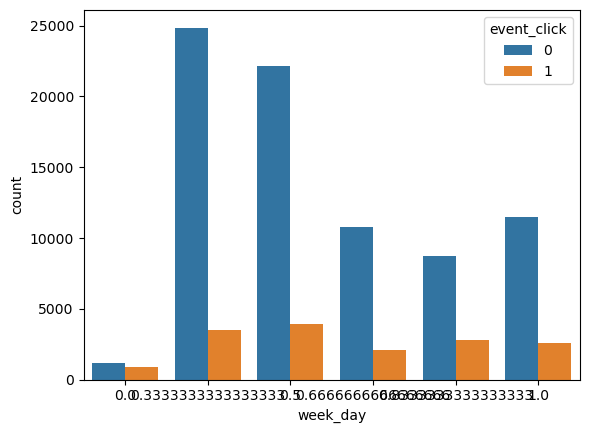

In [39]:
# построим счетную диаграмму зависимости кликов от дней недели
# заметно, что в первый день недели вероятность кликов гораздо выше
sns.countplot(x='week_day',hue='event_click',data=DF)

<Axes: xlabel='hour', ylabel='count'>

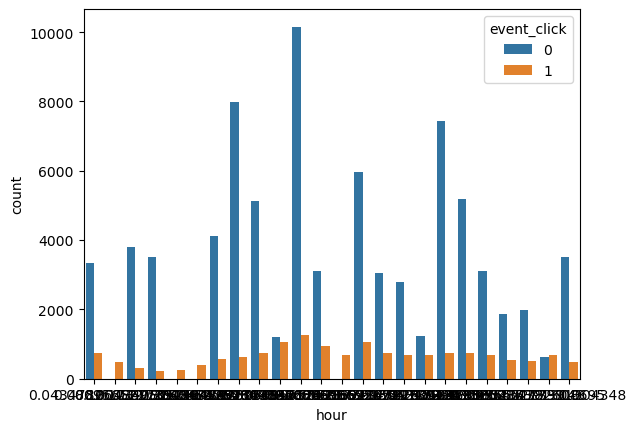

In [40]:
# зависимость кликов от дней недели
# заметно, что в определенные часы кликов гораздо больше
sns.countplot(x='hour',hue='event_click',data=DF)

In [69]:
# рассмотрим корреляцию переменных (тепловая карта)

In [41]:
DF2 = DF[['event_click', 'publisher_website', 'visitor_device_os',
       'visitor_region', 'visitor_browser', 'week_day', 'hour',1]]

In [42]:
corr = DF2.corr()

In [43]:
corr

,event_click,publisher_website,visitor_device_os,visitor_region,visitor_browser,week_day,hour,1
event_click,1.000000,-0.189314,-0.145438,-0.006560,-0.109253,0.038352,0.026595,0.014497
publisher_website,-0.189314,1.000000,0.059237,-0.008473,0.018791,-0.112412,-0.072688,-0.212880
visitor_device_os,-0.145438,0.059237,1.000000,0.024151,0.722922,-0.101628,-0.023147,-0.072707
visitor_region,-0.006560,-0.008473,0.024151,1.000000,0.010400,-0.008040,0.012638,-0.008303
visitor_browser,-0.109253,0.018791,0.722922,0.010400,1.000000,-0.081710,-0.005161,-0.034137
week_day,0.038352,-0.112412,-0.101628,-0.008040,-0.081710,1.000000,-0.028665,0.027583
hour,0.026595,-0.072688,-0.023147,0.012638,-0.005161,-0.028665,1.000000,-0.006740
1,0.014497,-0.212880,-0.072707,-0.008303,-0.034137,0.027583,-0.006740,1.000000


Text(0.5, 1.05, 'Pearson correlation of Features')

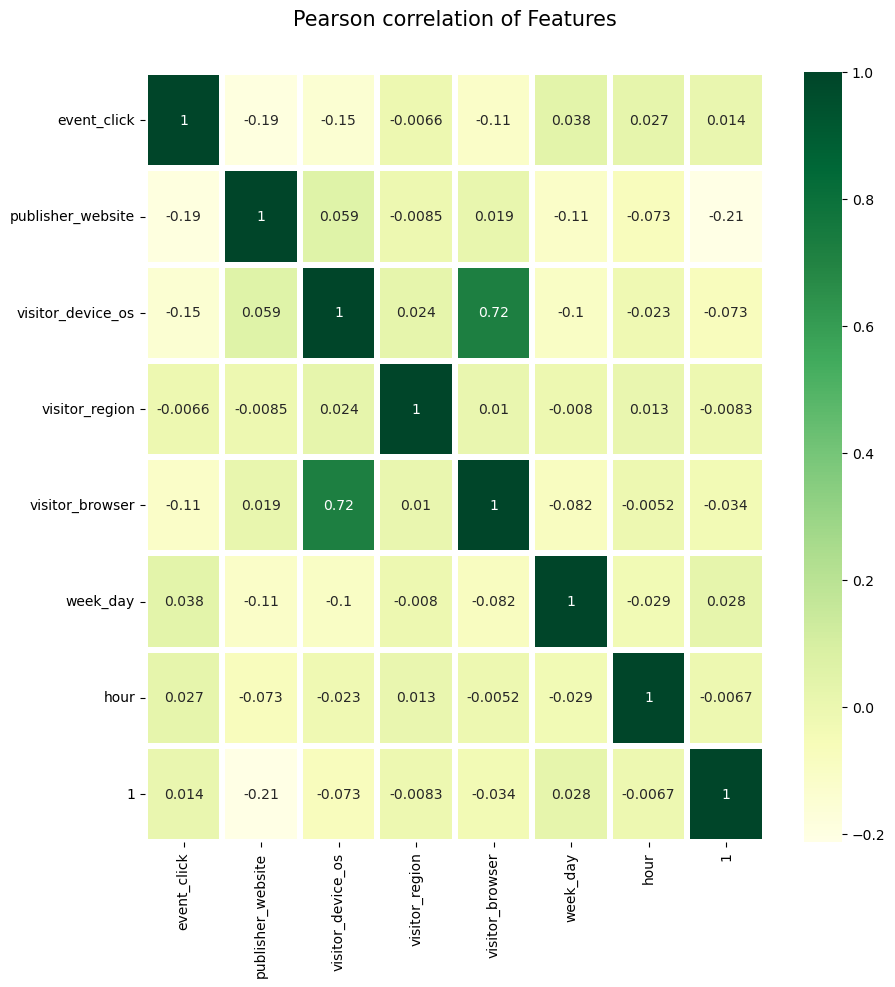

In [44]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

In [70]:
# между visitor_device_os и visitor_browser высокая корреляция, один из них можно удалить

In [45]:
DF = DF.drop(columns=['visitor_device'],axis=1)
DF.columns = DF.columns.astype(str)

In [46]:
DF.columns

Index(['event_click', 'publisher_website', 'visitor_device_os',
       'visitor_region', 'visitor_browser', 'week_day', 'hour', '1', '3', '10',
       '11', '13', '200', '201', '204', '206', '207', '210', '211', '212',
       '213', '217', '219', '220', '2000', '2003', '2004', '2006', '2042',
       '2060', '2100', '2120', '2170', '2190', '2200', '2206', '21000',
       '21001', '21700', '21701', '22015', '22016', '22023'],
      dtype='object')

### Разбиение данных на выборки

In [47]:
# разделяем входные данные и метки
x = DF.drop(columns=['event_click'],axis=1)
y = DF['event_click']

In [48]:
x.shape

(94944, 42)

In [49]:
from sklearn.model_selection import train_test_split
# делим данные на 3 выборки: train (тренировочная), test (валидационная) и check (проверочная)
x_check = x[-50:]
y_check = y[-50:]
X = x[:-50]
Y = y[:-50]

In [50]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X_train.shape, X_test.shape,x_check.shape)

(85404, 42) (9490, 42) (50, 42)


### Построение модели

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# accuracy score on training data
X_train_pred = model.predict(X_train)
train_pr = precision_score(X_train_pred,Y_train,average='weighted')
train_rec = recall_score(X_train_pred,Y_train,average='weighted')
print(train_pr,train_rec)

0.8332630790126926 0.8332630790126926


In [53]:
# accuracy score on test data
X_test_pred = model.predict(X_test)
test_pr = precision_score(X_test_pred,Y_test,average='micro')
test_rec = recall_score(X_test_pred,Y_test,average='micro')
print(test_pr,test_rec)

0.8332982086406744 0.8332982086406744


In [54]:
# predicted data
pred = model.predict(x_check)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
np.array(y_check)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [57]:
import keras
from keras import preprocessing
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from tensorflow.keras import layers
import tensorflow as tf

In [58]:
inputs = keras.Input(shape=(42,1))
x = layers.BatchNormalization()(inputs)


x = layers.Conv1D(filters=7, kernel_size=4, padding="same", activation='relu')(x) # слой свертки
x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(2, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs, name="classification-model")
model2.summary()

Model: "classification-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42, 1)]           0         
                                                                 
 batch_normalization (BatchN  (None, 42, 1)            4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 42, 7)             35        
                                                                 
 dense (Dense)               (None, 42, 4)             32        
                                                                 
 dense_1 (Dense)             (None, 42, 2)             10        
                                                                 
 flatten (Flatten)           (None, 84)                0         
                                              

In [59]:
model2.compile(loss='mse',optimizer='sgd',metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [60]:
fit_results = model2.fit(x=X_train,y=Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
2136/2136 [==============================] - 6s 2ms/step - loss: 0.1426 - accuracy: 0.8296 - precision: 0.1538 - recall: 0.0051 - val_loss: 0.1389 - val_accuracy: 0.8331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2136/2136 [==============================] - 5s 2ms/step - loss: 0.1395 - accuracy: 0.8334 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1387 - val_accuracy: 0.8331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
2136/2136 [==============================] - 5s 2ms/step - loss: 0.1391 - accuracy: 0.8334 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1384 - val_accuracy: 0.8331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
2136/2136 [==============================] - 5s 2ms/step - loss: 0.1386 - accuracy: 0.8334 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1379 - val_accuracy: 0.8331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
2136/2136 [=============

In [62]:
model2.evaluate(X_test, Y_test) #loss,accuracy,precison,recall

297/297 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.8761 - precision: 0.8415 - recall: 0.3156


[0.11163722723722458,
 0.8760800957679749,
 0.8414839506149292,
 0.315623015165329]

In [63]:
g = lambda x: 1 if x>0.5 else 0

In [66]:
# predicted data
pred = model2.predict(x_check)
pred = np.array(list(map(g,pred)))
pred

2/2 [==============================] - 0s 2ms/step


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [67]:
np.array(y_check)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [68]:
# результаты нейросети лучше, чем результаты логистической регрессии. 
# мы имеем высокий precision 84% и низкий recall 32%, то есть у нас высокий порог принятия решений - мы лишний раз метим 0 # вместо того, чтобы лишний раз ошибиться, отметив 1 (FN для нас менее важен, чем FP, следовательно более важная метрика - precision)